In [4]:
!pip install opendatasets --quiet

In [5]:
import opendatasets as od

In [6]:
od.download('https://www.kaggle.com/datasets/mohansacharya/graduate-admissions')

Dataset URL: https://www.kaggle.com/datasets/mohansacharya/graduate-admissions


100%|██████████| 9.64k/9.64k [00:00<00:00, 11.5MB/s]

In [7]:
import pandas as pd
import numpy as np

In [8]:
data = pd.read_csv("/content/graduate-admissions/Admission_Predict_Ver1.1.csv")

In [9]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [11]:
data.isna().sum()

,0
Serial No.,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


In [12]:
data.duplicated().sum()

np.int64(0)

In [13]:
# There are no missing or duplicated values

In [14]:
data.drop(columns=['Serial No.'], axis=1, inplace=True)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [16]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

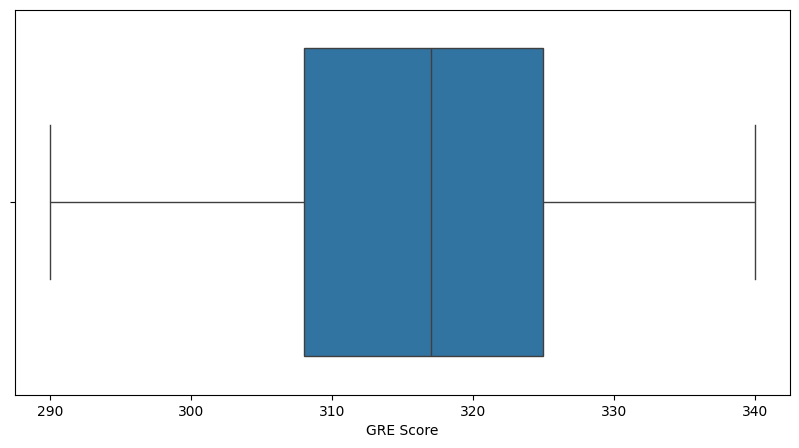

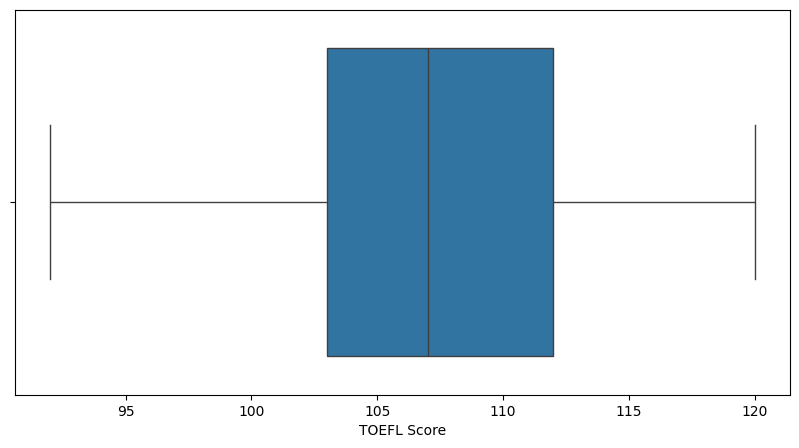

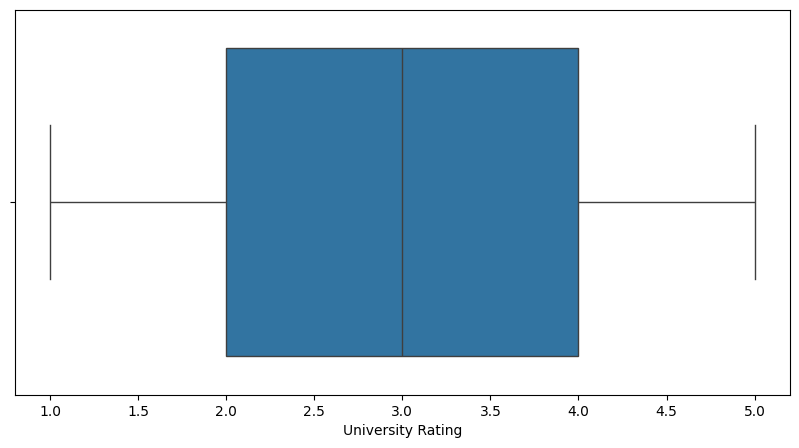

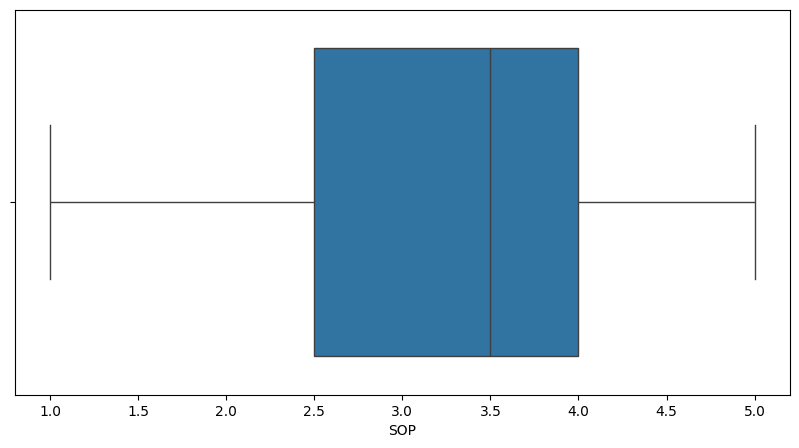

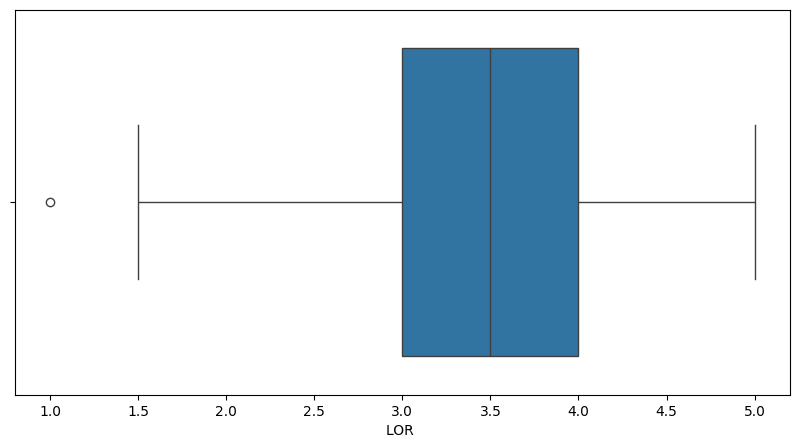

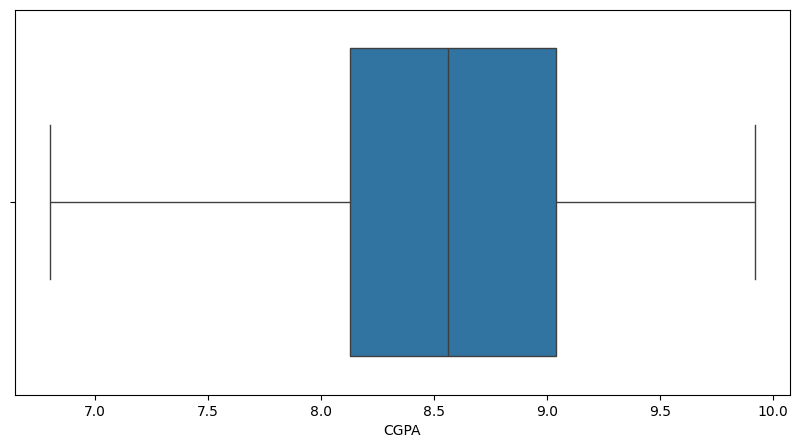

In [18]:
cols = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA']

for col in cols:
  plt.figure(figsize=(10, 5))
  sns.boxplot(data=data, x=col)
  plt.show()

<Figure size 1000x500 with 0 Axes>

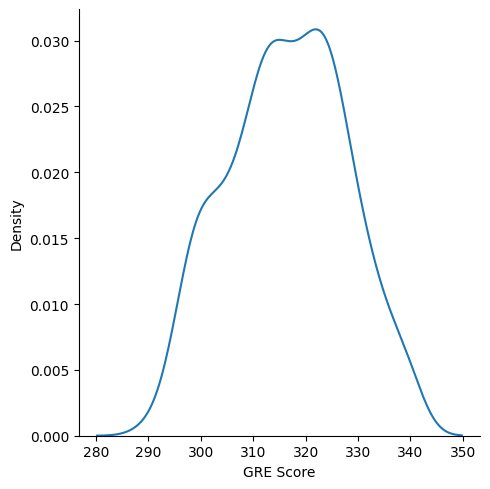

<Figure size 1000x500 with 0 Axes>

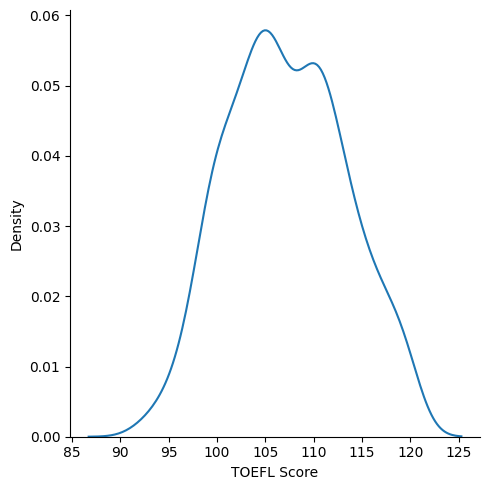

<Figure size 1000x500 with 0 Axes>

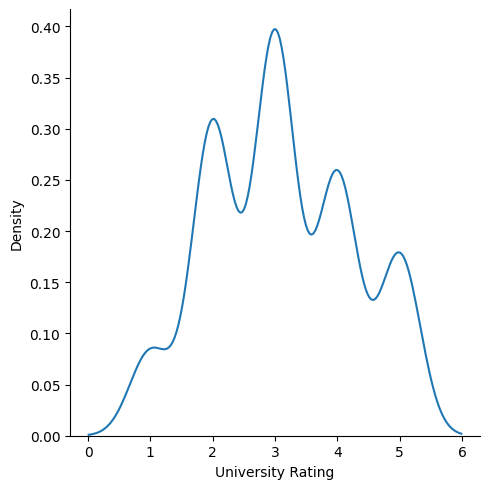

<Figure size 1000x500 with 0 Axes>

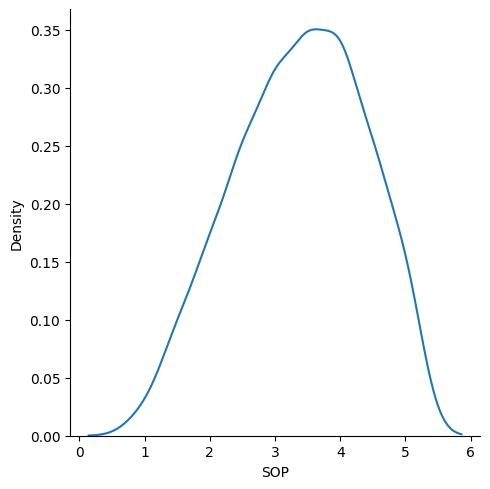

<Figure size 1000x500 with 0 Axes>

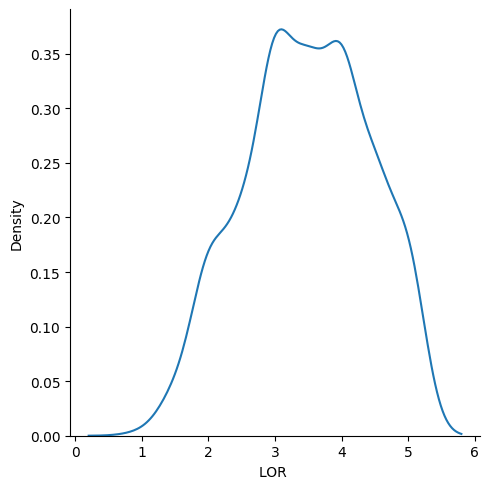

<Figure size 1000x500 with 0 Axes>

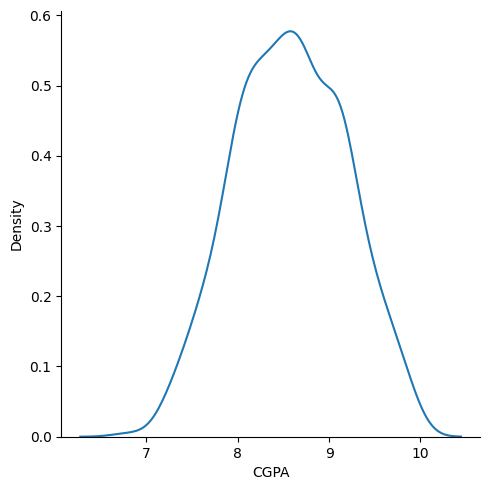

In [19]:
for col in cols:
  plt.figure(figsize=(10, 5))
  sns.displot(data=data, x=col, kind='kde')
  plt.show()

In [20]:
# All are normally distributed with some having multiple peaks.

In [21]:
colData = data['LOR ']

sorted(colData)

Q1, Q3 = np.percentile(colData, [25, 75])

IQR = Q3 - Q1

lr = Q1 - 1.5 * IQR
ur = Q3 + 1.5 * IQR

print(f"LR: {lr}, UR: {ur}")

LR: 1.5, UR: 5.5


In [22]:
data[ (data['LOR '] < lr) | (data['LOR '] > ur)]

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
347,299,94,1,1.0,1.0,7.34,0,0.42


In [23]:
data = data[ (data['LOR '] > lr) & (data['LOR '] < ur)]

<Axes: xlabel='LOR '>

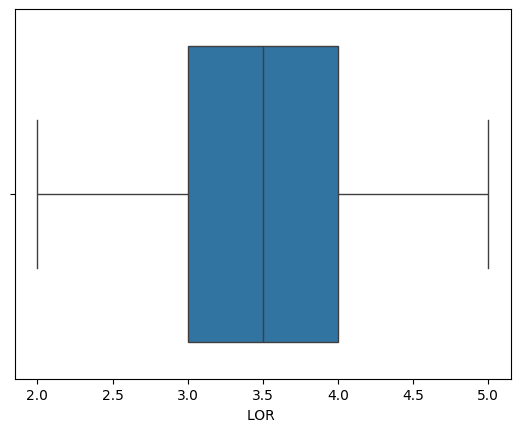

In [24]:
sns.boxplot(data=data, x='LOR ')

In [25]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 488 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          488 non-null    int64  
 1   TOEFL Score        488 non-null    int64  
 2   University Rating  488 non-null    int64  
 3   SOP                488 non-null    float64
 4   LOR                488 non-null    float64
 5   CGPA               488 non-null    float64
 6   Research           488 non-null    int64  
 7   Chance of Admit    488 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 34.3 KB


In [27]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [28]:
from sklearn.preprocessing import StandardScaler

feat_cols = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']

sc = StandardScaler()

data[feat_cols] = sc.fit_transform(data[feat_cols])



In [29]:
data[feat_cols]

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1.810473,1.776587,0.753395,1.121061,1.099711,1.763197,0.872773
1,0.648664,-0.061285,0.753395,0.609295,1.099711,0.463287,0.872773
2,-0.066295,-0.562523,-0.134665,-0.414237,-0.038484,-0.986612,0.872773
3,0.469924,0.439953,-0.134665,0.097529,-1.176679,0.129977,0.872773
4,-0.245035,-0.729602,-1.022725,-1.437768,-0.607582,-0.636636,-1.145773
...,...,...,...,...,...,...,...
495,1.363623,0.105794,1.641455,1.121061,0.530613,0.713270,0.872773
496,1.810473,1.609507,1.641455,1.632826,1.668808,2.129838,0.872773
497,1.184884,2.110745,1.641455,1.121061,1.668808,1.613208,0.872773
498,-0.423774,-0.729602,0.753395,0.609295,1.668808,-0.269995,-1.145773


In [30]:
from sklearn.preprocessing import MinMaxScaler

label_col = 'Chance of Admit '

minMax = MinMaxScaler()

data[label_col] = minMax.fit_transform(data[[label_col]])

In [31]:
data[label_col]

,Chance of Admit
0,0.920635
1,0.666667
2,0.603175
3,0.730159
4,0.492063
...,...
495,0.841270
496,0.984127
497,0.936508
498,0.619048


In [32]:
processed_df = pd.concat([data[feat_cols], data[label_col]], axis=1)
processed_df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1.810473,1.776587,0.753395,1.121061,1.099711,1.763197,0.872773,0.920635
1,0.648664,-0.061285,0.753395,0.609295,1.099711,0.463287,0.872773,0.666667
2,-0.066295,-0.562523,-0.134665,-0.414237,-0.038484,-0.986612,0.872773,0.603175
3,0.469924,0.439953,-0.134665,0.097529,-1.176679,0.129977,0.872773,0.730159
4,-0.245035,-0.729602,-1.022725,-1.437768,-0.607582,-0.636636,-1.145773,0.492063


In [33]:
features = processed_df.drop(columns=['Chance of Admit '], axis=1).values


In [34]:
label = processed_df['Chance of Admit '].values

In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()

scores = cross_val_score(model, features, label, cv=5)

print(scores)

print(f"CL: {scores.mean()}")

[0.54906962 0.67261249 0.44694398 0.64064702 0.403922  ]
CL: 0.5426390206423247


In [36]:
# CL value is very less for Decision Tree. Let's try Random Forest.

In [37]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor()

scores_rf = cross_val_score(model_rf, features, label, cv=5)

print(scores_rf)

print(f"CL: {scores_rf.mean()}")

[0.64936899 0.71980441 0.8640456  0.78160905 0.86566848]
CL: 0.7760993058367885


In [38]:
# Getting improved CL. Let's use that to get a better test score

In [39]:
CL = np.round(scores_rf.mean(), 2)

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

for seed in range(1, 301):
  X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=seed)

  model = DecisionTreeRegressor(max_depth=20)

  model.fit(X_train, y_train)

  test = model.score(X_test, y_test)
  train = model.score(X_train, y_train)

  if test > train and test >= CL:
    print(f"Testscore: {test} | Trainscore: {train} | RS: {seed}")

In [40]:
# We are not getting any scores because it is overfitted. As training scores > testing scores

In [41]:
# So, bagging needs to be done. Let's implement Random Forest which does Bagging and Decision Tree together.

In [42]:
CL = np.round(scores_rf.mean(), 2)

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

for seed in range(1, 301):
  X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=seed)

  model = RandomForestRegressor(n_estimators=10, max_depth=3)

  model.fit(X_train, y_train)

  test = model.score(X_test, y_test)
  train = model.score(X_train, y_train)

  if test >= train and test >= CL:
    print(f"Testscore: {test} | Trainscore: {train} | RS: {seed}")

Testscore: 0.8317305910302986 | Trainscore: 0.8044470184859382 | RS: 6
Testscore: 0.8187232599620055 | Trainscore: 0.8089835616929545 | RS: 25
Testscore: 0.8432219478608234 | Trainscore: 0.808960432287593 | RS: 40
Testscore: 0.8215329204172771 | Trainscore: 0.8054263226027353 | RS: 41
Testscore: 0.8067296741469143 | Trainscore: 0.8042566335342773 | RS: 46
Testscore: 0.8292154762787821 | Trainscore: 0.8027692310961597 | RS: 51
Testscore: 0.8174379770303125 | Trainscore: 0.8055881972779368 | RS: 65
Testscore: 0.8379147683926147 | Trainscore: 0.798499471320584 | RS: 66
Testscore: 0.8148848538230975 | Trainscore: 0.8091607028887745 | RS: 81
Testscore: 0.8068089357427728 | Trainscore: 0.8035709231827224 | RS: 107
Testscore: 0.8484366158550944 | Trainscore: 0.7979542278126428 | RS: 108
Testscore: 0.8174408419030124 | Trainscore: 0.8037553589294149 | RS: 109
Testscore: 0.8700764113351375 | Trainscore: 0.7924103601222411 | RS: 120
Testscore: 0.8389201848359252 | Trainscore: 0.8010373199698292 

In [43]:
# Testscore: 0.8666653580960542 | Trainscore: 0.7992381260250598 | RS: 120
# First, tried with n_estimators=300 and max_depth=20. Still got an overfitted model. After reducing them, we got the generalized model with better scores.

In [44]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=120)

model = RandomForestRegressor(n_estimators=10, max_depth=3)

model.fit(X_train, y_train)

test = model.score(X_test, y_test)
train = model.score(X_train, y_train)

if test >= train and test >= CL:
  print(f"Testscore: {np.round(test, 2)} | Trainscore: {np.round(train, 2)}")

Testscore: 0.85 | Trainscore: 0.81


In [45]:
import joblib

In [46]:
joblib.dump(model, 'uni-admission-pred.pkl')

['uni-admission-pred.pkl']

In [47]:
# get the user inputs

In [48]:
processed_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 488 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          488 non-null    float64
 1   TOEFL Score        488 non-null    float64
 2   University Rating  488 non-null    float64
 3   SOP                488 non-null    float64
 4   LOR                488 non-null    float64
 5   CGPA               488 non-null    float64
 6   Research           488 non-null    float64
 7   Chance of Admit    488 non-null    float64
dtypes: float64(8)
memory usage: 34.3 KB


In [49]:
gre = float(input('Enter GRE Score: (290 - 340)'))
toefl = float(input('Enter TOEFL Score: (80 - 120)'))
rating = float(input('Enter University Rating: (0 - 5)'))
sop = float(input('Enter SOP Score: (0 - 5)'))
lor = float(input('Enter LOR Score: (0 - 5)'))
cgpa = float(input('Enter CGPA: (5 - 10)'))
research = float(input('Have you done any research?: 0 (No) / 1 (Yes)'))


final_model = joblib.load('uni-admission-pred.pkl')

pred = final_model.predict([[gre, toefl, rating, sop, lor, cgpa, research]])

print(f"Chance of Admission: {np.round(pred[0], 2)*100}%")

Enter GRE Score: (290 - 340)297
Enter TOEFL Score: (80 - 120)88
Enter University Rating: (0 - 5)3.25
Enter SOP Score: (0 - 5)3.5
Enter LOR Score: (0 - 5)3.25
Enter CGPA: (5 - 10)7.9
Have you done any research?: 0 (No) / 1 (Yes)1
Chance of Admission: 95.0%
